In [21]:
import numpy as np
from scipy import stats
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Offset the effect caused by small number of extreme values -> trimmed mean

In [22]:
df = pd.DataFrame({'points': [25, 12, 15, 14, 19, 23, 25, 29],
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4],
                   'rebounds': [11, 8, 10, 6, 6, 5, 9, 12]})


#calculate 5% trimmed mean of points
print("Trimmed mean: ", stats.trim_mean(df[['points', 'assists']], 0.05))
print("Mean: ", df[['points', 'assists']].mean())


Trimmed mean:  [20.25  7.75]
Mean:  points     20.25
assists     7.75
dtype: float64


[//]: <> (1. Introduction)
<a id="1"></a>
# <div style="padding:20px;color:#ffffff;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Five-Number Summary, Boxplots, and Outliers</b></div>


In [23]:
df = pd.DataFrame({'points': [25, 12, 15, 14, 19, 23, 25, 29],
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4],
                   'rebounds': [11, 8, 10, 6, 6, 5, 9, 12]})

In [24]:
df.describe()

,points,assists,rebounds
count,8.000000,8.00000,8.000000
mean,20.250000,7.75000,8.375000
std,6.158618,2.54951,2.559994
min,12.000000,4.00000,5.000000
25%,14.750000,6.50000,6.000000
50%,21.000000,8.00000,8.500000
75%,25.000000,9.00000,10.250000
max,29.000000,12.00000,12.000000


<Axes: xlabel='variable', ylabel='value'>

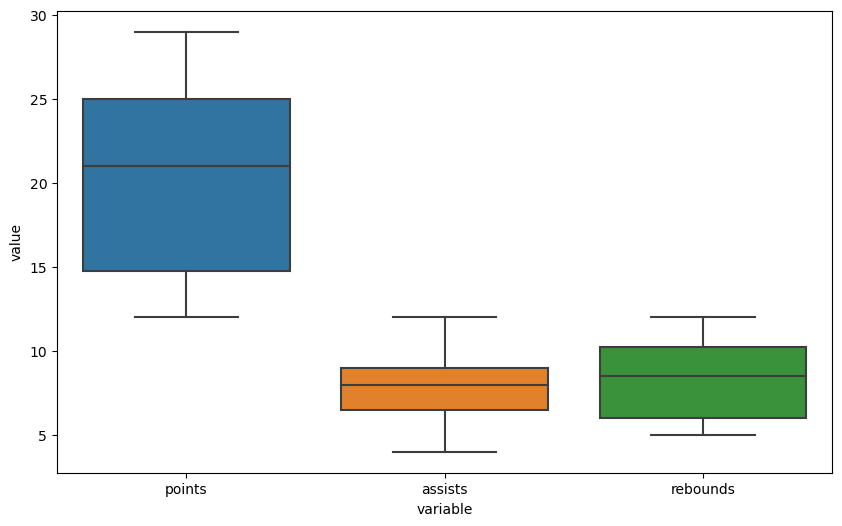

In [25]:
#melt data frame into long format
df_melted = pd.melt(df)

#view first 10 rows of melted data frame
df_melted.head(10)

#create seaborn boxplots by group
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='variable', y='value', data=df_melted)


In [26]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each selected column
for col in df.columns.tolist():
    df_ = remove_outliers_iqr(df, col)

# Display the DataFrame after removing outliers
print("\nDataFrame after removing outliers:")
df_


DataFrame after removing outliers:


,points,assists,rebounds
0,25,5,11
1,12,7,8
2,15,7,10
3,14,9,6
4,19,12,6
5,23,9,5
6,25,9,9
7,29,4,12
